In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def colvar_to_df(f):
    colnames=f.readline().strip('#! FIELDS ').split()
    return pd.read_table(f,skiprows=0,header=None,sep=' ',names=colnames).set_index(colnames[0])
 

# 275K

In [2]:
with open('275\\COLVAR_275') as f:
    df_275 = colvar_to_df(f)

<AxesSubplot:xlabel='time'>

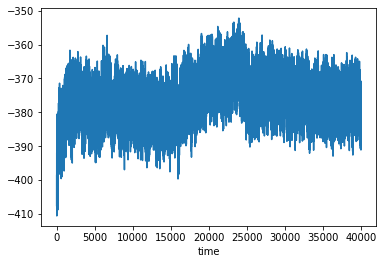

In [3]:
df_275['sasa'].plot()

<AxesSubplot:ylabel='Frequency'>

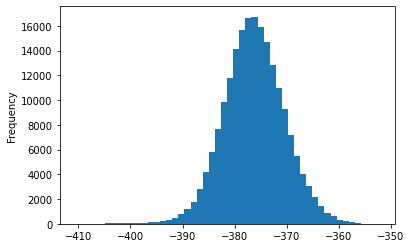

In [4]:
df_275['sasa'].plot.hist(bins=50)

# 300 K

<AxesSubplot:xlabel='time'>

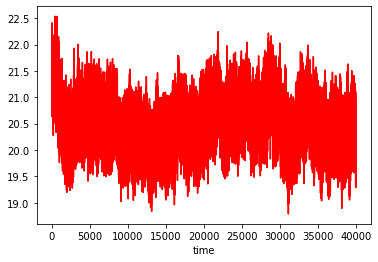

In [5]:
with open('300\\COLVAR_300') as f:
    df_300 = colvar_to_df(f)
df_300['sasa'].plot(color='red')

<AxesSubplot:ylabel='Frequency'>

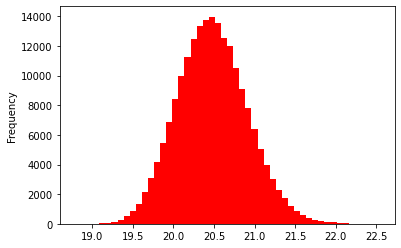

In [6]:
df_300['sasa'].plot.hist(color='red',bins=50)

# 325 K

<AxesSubplot:xlabel='time'>

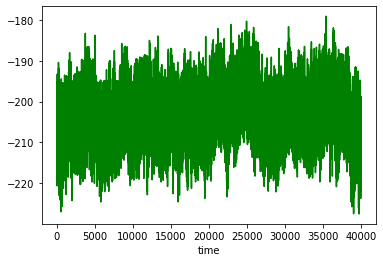

In [7]:
with open('325\\COLVAR_325') as f:
    df_325 = colvar_to_df(f)
df_325['sasa'].plot(color='green')

<AxesSubplot:ylabel='Frequency'>

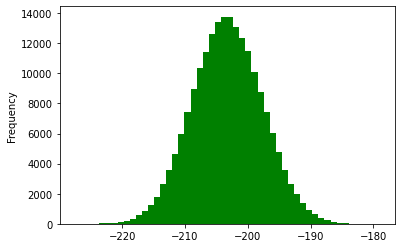

In [8]:
df_325['sasa'].plot.hist(color='green',bins=50)

# Combined data

<AxesSubplot:>

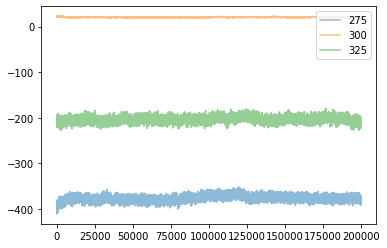

In [9]:
df = pd.DataFrame(data={275:df_275['sasa'].values,300:df_300['sasa'].values,325:df_325['sasa'].values})
df.plot(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

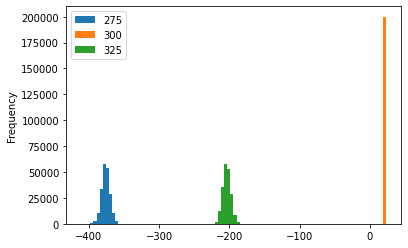

In [10]:
df.plot.hist(bins=100)

# Using STRIDE=2

<AxesSubplot:xlabel='time'>

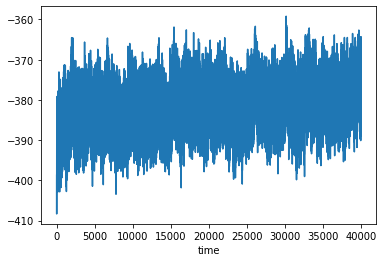

In [11]:
with open('275_stride2\\COLVAR_275_stride2') as f:
    df_275_stride2 = colvar_to_df(f)
df_275_stride2['sasa'].plot()

<AxesSubplot:ylabel='Frequency'>

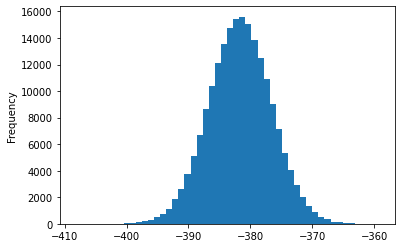

In [12]:
df_275_stride2['sasa'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

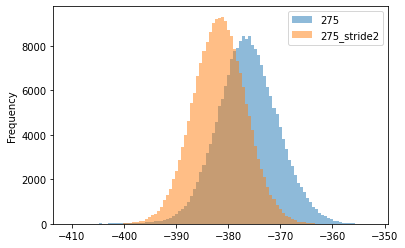

In [14]:
df['275_stride2'] = df_275_stride2['sasa'].values
df[[275,'275_stride2']].plot.hist(alpha=0.5, bins=100)

In [16]:
from scipy.stats import ttest_ind
print(ttest_ind(df[275].values,df['275_stride2'].values,equal_var=False))

Ttest_indResult(statistic=311.878186502604, pvalue=0.0)


<AxesSubplot:>

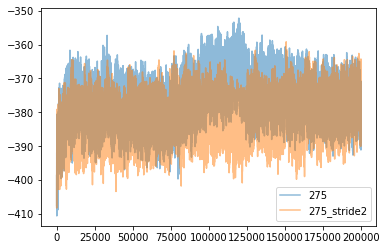

In [17]:
df[[275,'275_stride2']].plot(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

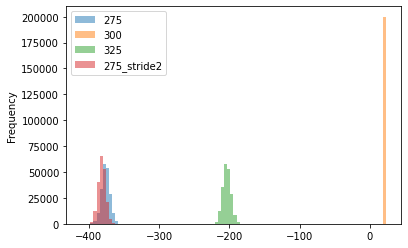

In [19]:
df.plot.hist(bins=100,alpha=0.5)